## sscws Example Jupyter Notebook

This notebook demonstrates using the [sscws](https://pypi.org/project/sscws/) to access satellite location and (modeled) magnetic field information.

### Prerequisites
1. pip install sscws

### Setup

In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from sscws.sscws import SscWs
ssc = SscWs()

In [5]:
ssc.get_observatories().index('dmsp')

ValueError: tuple.index(x): x not in tuple

### Get Observatories
The following code demonstrates how to get the list of available observatories.

In [2]:
for observatory in ssc.get_observatories():
    print(observatory['Id'], observatory['Name'], observatory['StartTime'])

TypeError: 'int' object is not subscriptable

### Get Locations

The following code gets location information for the International Space Station (ISS) spacecraft.

In [6]:
status, result = ssc.get_locations(['iss'],
                                   ['2020-01-01T00:00:00Z',
                                    '2020-01-01T01:00:00Z'])

Now plot the ISS location information.

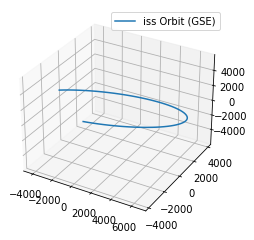

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
data = result['Data'][0]
coords = data['Coordinates']
title = data['Id'] + ' Orbit (' + \
        coords['CoordinateSystem'].value.upper() + ')'
ax.plot(coords['X'], coords['Y'], coords['Z'], label=title)
ax.legend()
plt.show()